In [15]:
# pip install -r requirement.txt

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [17]:

file_path = 'credit_score.csv'
credit_score_df = pd.read_csv(file_path)


In [18]:
credit_score_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [19]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [20]:
missing=credit_score_df.isnull().sum()
print(missing)
# Optionally, drop rows with missing values or fill them with appropriate values
# For this example, let's drop rows with any missing values
credit_score_df = credit_score_df.dropna()


ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [21]:
credit_score_df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [22]:
credit_score_df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


# Visulization

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

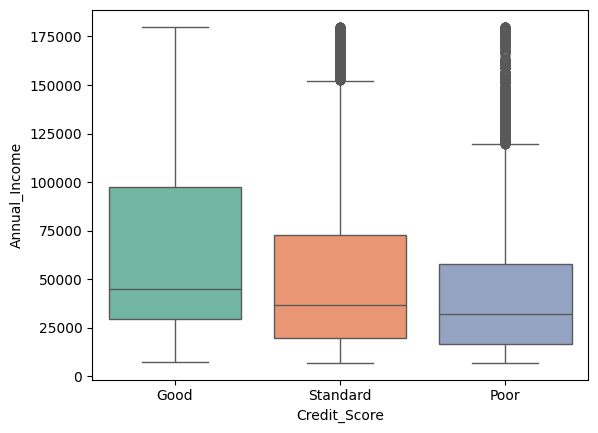

In [23]:
sns.boxplot(y='Annual_Income', x='Credit_Score', data=credit_score_df,palette='Set2')

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

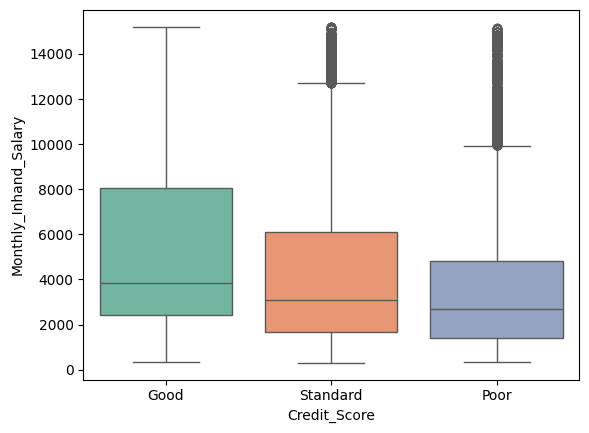

In [24]:
sns.boxplot(y='Monthly_Inhand_Salary',x='Credit_Score',data=credit_score_df,palette='Set2')

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

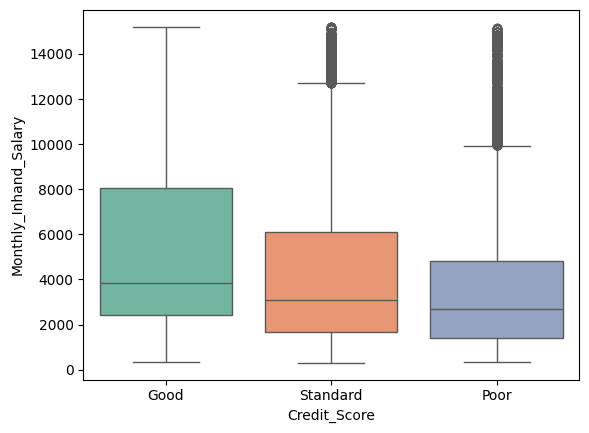

In [25]:
sns.boxplot(x='Credit_Score' ,y='Monthly_Inhand_Salary', data=credit_score_df, palette='Set2')

<Axes: xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

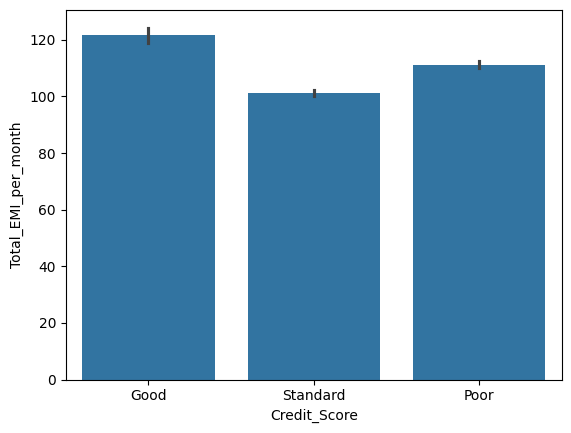

In [26]:
sns.barplot(y='Total_EMI_per_month',x='Credit_Score',data=credit_score_df)

# Preprocessing

In [27]:
# encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

credit_score_df["Credit_Mix"]=le.fit_transform(credit_score_df["Credit_Mix"])
credit_score_df["Credit_Score"]=le.fit_transform(credit_score_df["Credit_Score"])
credit_score_df["Occupation"]=le.fit_transform(credit_score_df["Occupation"])
credit_score_df["Payment_Behaviour"]=le.fit_transform(credit_score_df["Payment_Behaviour"])

In [28]:
credit_score_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,26.822620,265.0,No,49.574949,21.465380,2,312.494089,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.944960,266.0,No,49.574949,21.465380,3,284.629162,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,28.609352,267.0,No,49.574949,21.465380,4,331.209863,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.377862,268.0,No,49.574949,21.465380,5,223.451310,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,24.797347,269.0,No,49.574949,21.465380,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,34.663572,378.0,No,35.104023,24.028477,0,479.866228,1
99996,155626,37932,5,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,40.565631,379.0,No,35.104023,24.028477,1,496.651610,1
99997,155627,37932,6,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,41.255522,380.0,No,35.104023,24.028477,0,516.809083,1
99998,155628,37932,7,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,33.638208,381.0,No,35.104023,24.028477,3,319.164979,2


In [29]:
credit_score_df['Credit_Score'].value_counts()
# 0 = Good
# 1 = poor
# 2 = standard

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

# seperating the independent and dependent variable as x and y

In [30]:
#seperate data data
X = np.array(credit_score_df[["Annual_Income", "Monthly_Inhand_Salary","Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance"]])
Y=np.array(credit_score_df[["Credit_Score"]])

In [31]:
X.shape


(100000, 12)

In [32]:
Y.shape

(100000, 1)

# Split the data into training and testing sets


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression

In [34]:
# Train Logistic Regression model
logi_reg = LogisticRegression(max_iter=1000, random_state=42)
logi_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [35]:
# Predict and evaluate
logi_reg_pred = logi_reg.predict(X_test)
logi_reg_acc = accuracy_score(y_test, logi_reg_pred)
logi_reg_report = classification_report(y_test, logi_reg_pred)

In [36]:
print(f"Logistic Regression Accuracy: {logi_reg_acc}")
# print("Logistic Regression Classification Report:")
# print(logi_reg_report)

Logistic Regression Accuracy: 0.59245


# Decision Tree

In [37]:
# Train Decision Tree model
deci_tree = DecisionTreeClassifier(random_state=42)
deci_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Predict and evaluate
deci_tree_pred = deci_tree.predict(X_test)
deci_tree_acc = accuracy_score(y_test, deci_tree_pred)
deci_tree_report = classification_report(y_test, deci_tree_pred)

In [39]:
print(f"Decision Tree Accuracy: {deci_tree_acc}")
# print("Decision Tree Classification Report:")
# print(deci_tree_report)

Decision Tree Accuracy: 0.76355


# Random Forest

In [40]:

pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import joblib
# Train Random Forest model
rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predict and evaluate
rand_for_pred = rand_for.predict(X_test)
rand_for_acc = accuracy_score(y_test, rand_for_pred)
rand_for_report = classification_report(y_test, rand_for_pred)

In [43]:
print(f"Random Forest Accuracy: {rand_for_acc}")

Random Forest Accuracy: 0.8152


In [44]:
# print("Random Forest Classification Report:")
# print(rand_for_report)

In [46]:
# Save the trained model
model_filename = 'rand_for_model.joblib'
joblib.dump(rand_for,model_filename )
print(f"Model saved to {model_filename}")

Model saved to rand_for_model.joblib


# Model comparision

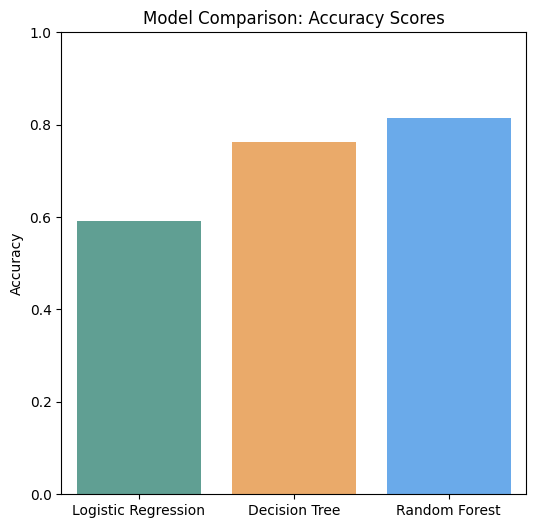

In [ ]:
# Plot accuracy scores
accuracy_scores = [logi_reg_acc, deci_tree_acc, rand_for_acc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
colors = ['#5A9', '#FA5', '#5AF']

plt.figure(figsize=(6, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette=colors)
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# model testing

In [ ]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
Result= rand_for.predict(features)
print("Predicted Credit Score = ",Result)

if Result==0:
  print("credit score:Good")
elif Result==1:
  print("credit score: poor")
else:
  print("credit score: standard")


Credit Score Prediction : 
Annual Income: 1000000
Monthly Inhand Salary: 10000
Number of Bank Accounts: 1
Number of Credit cards: 1
Interest rate: 5
Number of Loans: 1
Average number of days delayed by the person: 10
Number of delayed payments: 10
Credit Mix (Bad: 0, Standard: 1, Good: 3) : 3
Outstanding Debt: 23
Credit History Age: 23
Monthly Balance: 1000
Predicted Credit Score =  [2]
credit score: standard
